In [1]:
import sys
if 'google.colab' in sys.modules:
  !pip install -q dtreeviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.1 MB/s eta 0:00:00


In [2]:
import dtreeviz

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30,15]
from sklearn.datasets import *


In [3]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=2)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [5]:
viz_model = dtreeviz.model(clf_gini,
                             X_train,
                             y_train,
                   feature_names=iris.feature_names,
                   target_name="Iris",
                   class_names=iris.target_names
                   )


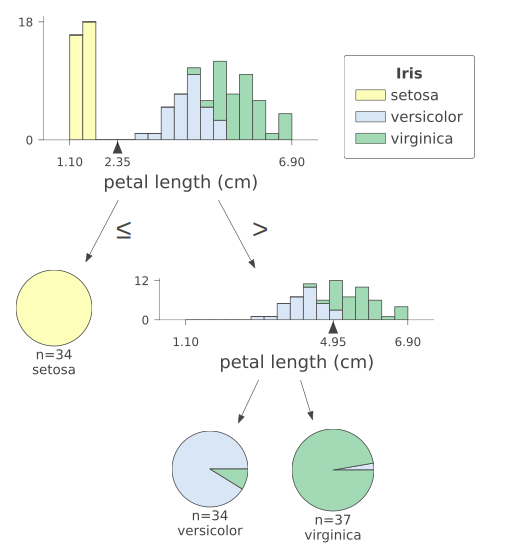

In [6]:
viz_model.view(scale=2)

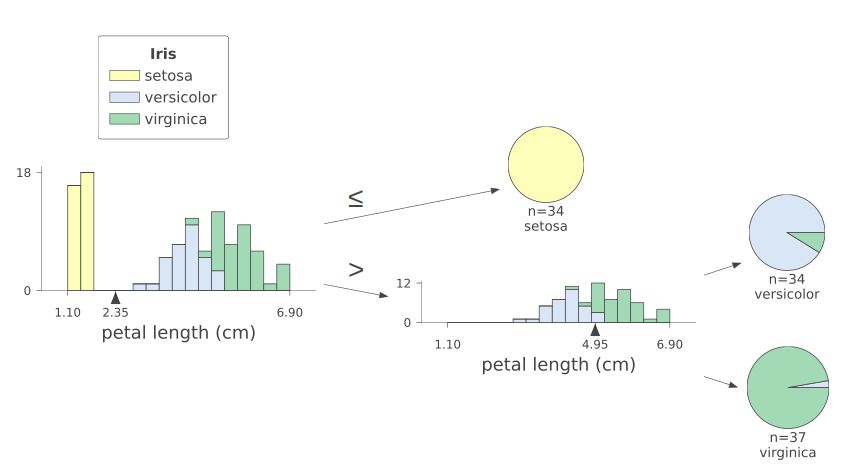

In [7]:
viz_model.view(orientation="LR", scale=2)

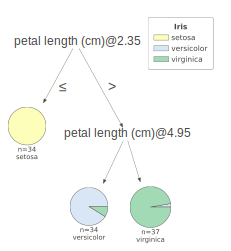

In [8]:
viz_model.view(fancy=False)

Another way to reduce the visualization size is to specify the tree depths of interest:

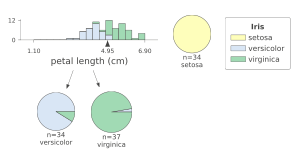

In [9]:
viz_model.view(depth_range_to_display=(1, 2)) # root is level 0

## Prediction path explanations

For interpretation purposes, we often want to understand how a tree behaves for a specific instance. Let's pick a specific instance:

In [10]:
x = X_test[10]
x

array([6.1, 2.6, 5.6, 1.4])

and then display the path through the tree structure:

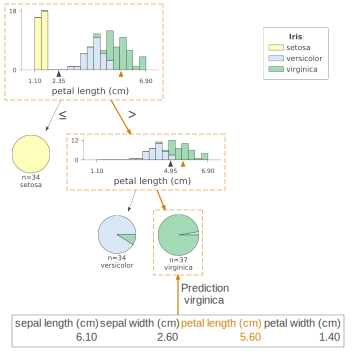

In [11]:
viz_model.view(x=x)

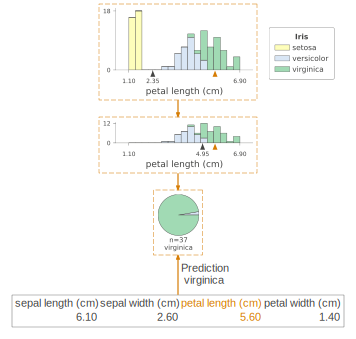

In [12]:
viz_model.view(x=x, show_just_path=True)

<h3>Decision Tree Regressor


In [13]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X=housing.data
y=housing.target
housing


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [14]:
reg=DecisionTreeRegressor(max_depth=3)
reg.fit(X,y)

DecisionTreeRegressor(max_depth=3)

[Text(0.5, 0.875, 'x[0] <= 5.035\nsquared_error = 1.332\nsamples = 20640\nvalue = 2.069'),
 Text(0.25, 0.625, 'x[0] <= 3.074\nsquared_error = 0.837\nsamples = 16255\nvalue = 1.735'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[2] <= 4.314\nsquared_error = 0.561\nsamples = 7860\nvalue = 1.357'),
 Text(0.0625, 0.125, 'squared_error = 0.67\nsamples = 3317\nvalue = 1.62'),
 Text(0.1875, 0.125, 'squared_error = 0.394\nsamples = 4543\nvalue = 1.165'),
 Text(0.375, 0.375, 'x[5] <= 2.373\nsquared_error = 0.837\nsamples = 8395\nvalue = 2.089'),
 Text(0.3125, 0.125, 'squared_error = 1.291\nsamples = 1954\nvalue = 2.79'),
 Text(0.4375, 0.125, 'squared_error = 0.505\nsamples = 6441\nvalue = 1.876'),
 Text(0.75, 0.625, 'x[0] <= 6.82\nsquared_error = 1.221\nsamples = 4385\nvalue = 3.306'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[5] <= 2.743\nsquared_error = 0.891\nsamples = 3047\nvalue = 2.906'),
 Text(0.5625, 0.125, 'squared_error = 1.006\nsamples = 1260\nvalue = 3.391'),
 Te

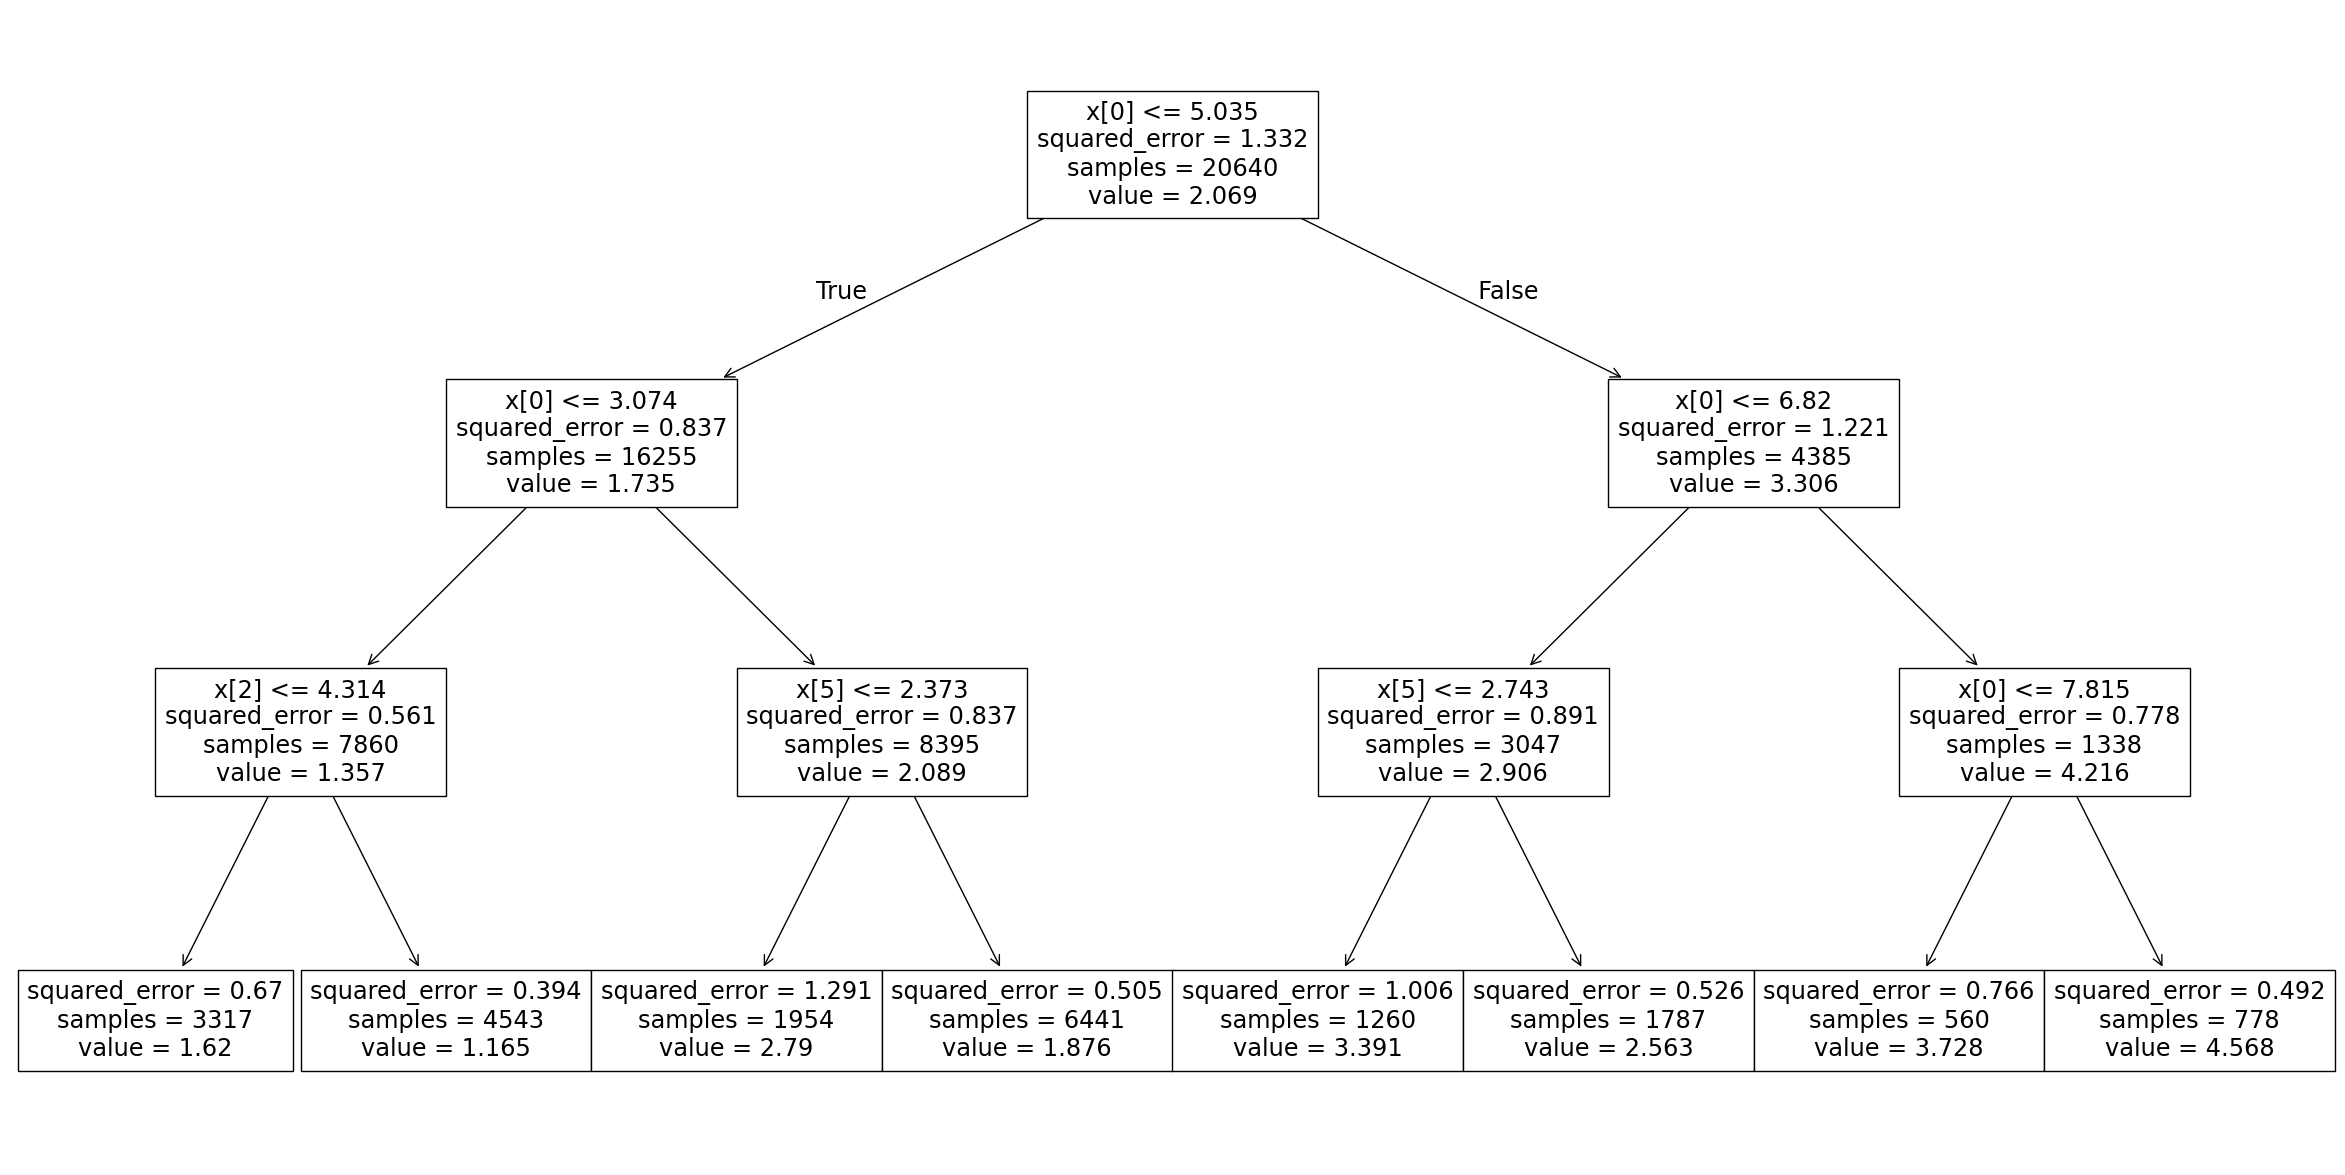

In [15]:
tree.plot_tree(reg)

In [16]:
viz_rmodel = dtreeviz.model(reg,X,y
                   )

In [17]:
viz_rmodel.view()

Output hidden; open in https://colab.research.google.com to view.

In [18]:
viz_rmodel.view(orientation="LR")

Output hidden; open in https://colab.research.google.com to view.